In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import animatplot as amp

In [2]:
E0 = np.array([1, 2])
E0 = E0 / np.linalg.norm(E0)

phi = np.array([0, np.pi/7])

f = 3
t = np.linspace(0,2*np.pi,100)

ES = E0[:, np.newaxis]*np.exp(1j*(t+phi[:, np.newaxis])) # fancy array boardcasting

<IPython.core.display.Javascript object>


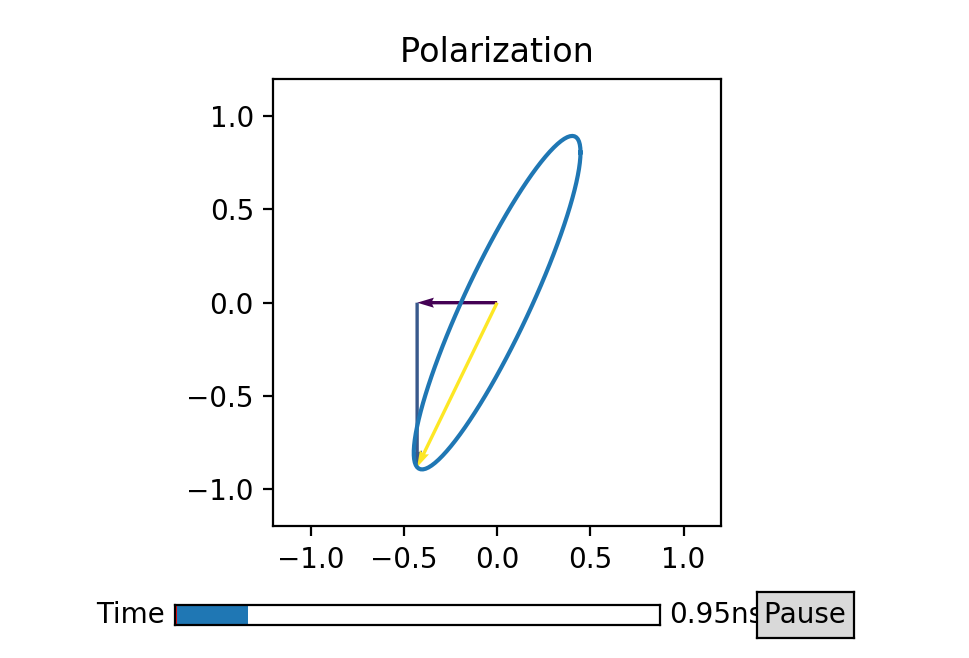

In [3]:
fig, ax = plt.subplots()

def animate(i):
    ax.set_title('Polarization')
    ax.set_aspect('equal')
    ax.set(xlim=(-1.2, 1.2), ylim=(-1.2, 1.2))

    E = E0*np.exp(1j*(f*t[i]+phi))

    xx = np.array([0,E[0].real,0])
    yy = np.array([0,0,0])
    uu = np.array([E[0].real,0,E[0].real])
    vv = np.array([0,E[1].real,E[1].real])

    plax = ax.plot(ES[0].real, ES.real[1])
    qax = ax.quiver(xx,yy,uu,vv,[0,55,200], scale_units='xy', scale=1.)

animate(0) # initialise the plot with the animate function

timeline = amp.Timeline(t, units='ns', fps=10)
block = amp.blocks.Nuke(animate, axis=ax, length=len(timeline))
anim = amp.Animation([block], timeline)

anim.controls()
anim.save_gif('nuke')
plt.show()

<IPython.core.display.Javascript object>


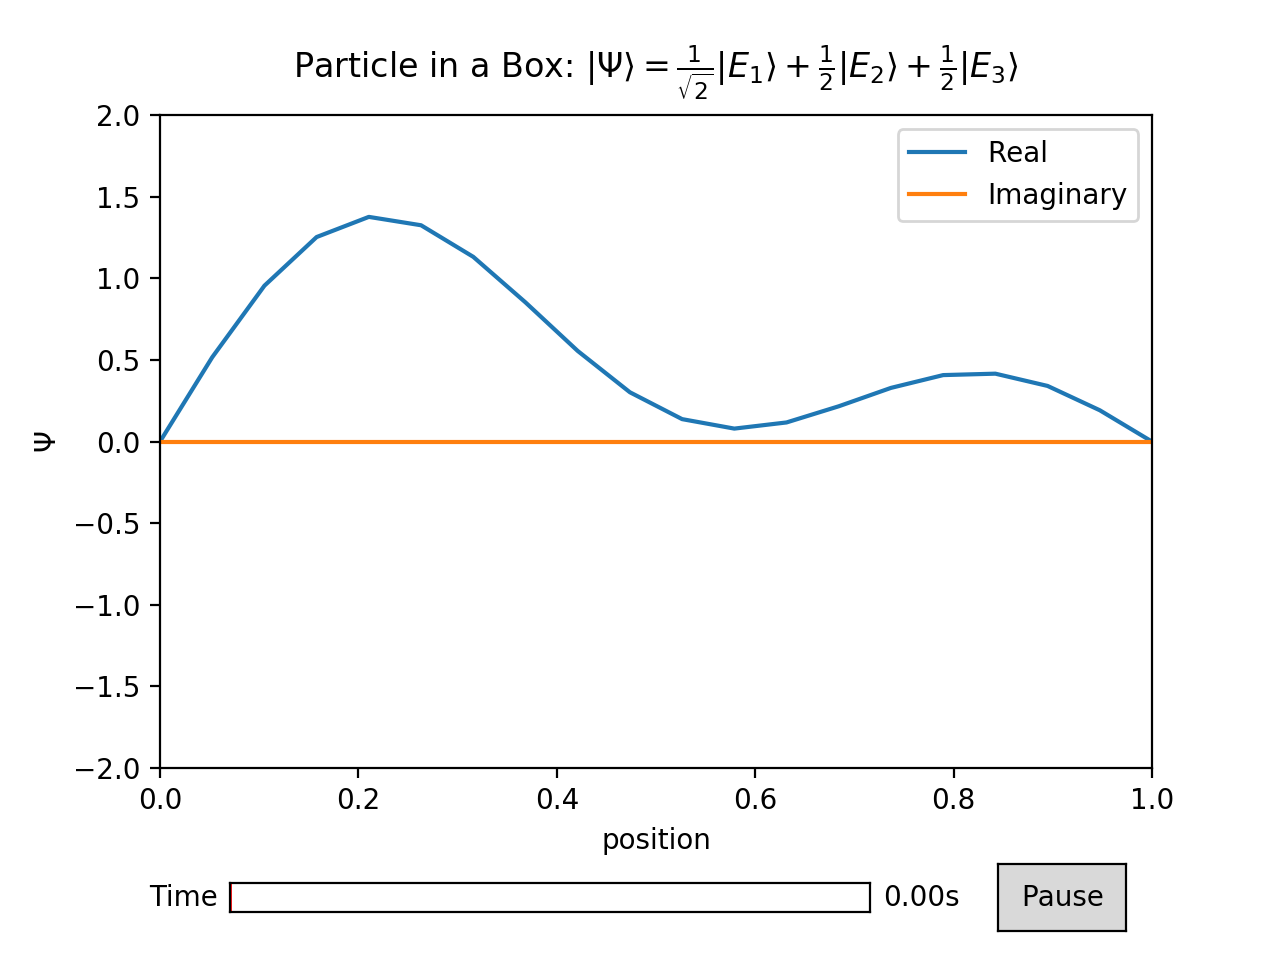

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import PillowWriter
import animatplot as aplt


def psi(x, t):
    return (2**-.5*np.exp(t*1j)*np.sin(np.pi*x)
            + .5*np.exp(t*4j)*np.sin(2*np.pi*x)
            + .5*np.exp(t*9j)*np.sin(3*np.pi*x))


x = np.linspace(0, 1, 20)
t = np.linspace(0, 10, 20)

X, T = np.meshgrid(x, t)
Y1 = psi(X, T).real
Y2 = psi(X, T).imag

timeline = aplt.Timeline(t, 's', 24)

ax = plt.axes(xlim=[0, 1], ylim=[-2, 2])
block1 = aplt.blocks.Line(X, Y1, ax)
block2 = aplt.blocks.Line(X, Y2, ax)

anim = aplt.Animation([block1, block2], timeline)

# Your standard matplotlib stuff
plt.title(r'Particle in a Box: $|\Psi\rangle = \frac{1}{\sqrt{2}}'
          r'|E_1\rangle + \frac{1}{2}|E_2\rangle + \frac{1}{2}|E_3\rangle$',
          y=1.03)
plt.xlabel('position')
plt.ylabel(r'$\Psi$')
plt.legend(['Real', 'Imaginary'])

anim.toggle()
anim.timeline_slider()

anim.save('sq_well.gif', writer=PillowWriter(fps=5))
plt.show()